In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn import datasets

% matplotlib inline

# Make dataset

In [2]:
def make_clusters(skew=True, *arg,**kwargs):
    X, y = datasets.make_blobs(*arg,**kwargs)
    if skew:
        nrow = X.shape[1]
        for i in np.unique(y):
            X[y==i] = X[y==i].dot(np.random.random((nrow,nrow))-0.5)
    return X,y

In [3]:
X, y = make_clusters(skew=False, n_samples=1500, centers=3, cluster_std=[1,.6,.8])
print(X.shape)
print(y.shape)
print(np.unique(y))

(1500, 2)
(1500,)
[0 1 2]


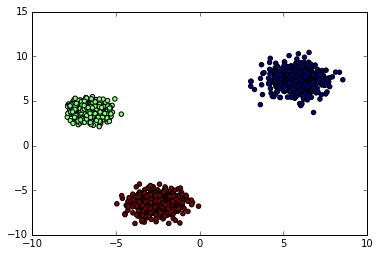

In [4]:
def scatter(X, color=None, ax=None):
    assert X.shape[1]==2
    if color is not None:
        assert X.shape[0]==y.shape[0]
        assert len(y.shape)==1
    if ax:
        ax.scatter(X[:, 0], X[:, 1], c=color)
    else:
        plt.scatter(X[:, 0], X[:, 1], c=color)

scatter(X, y)

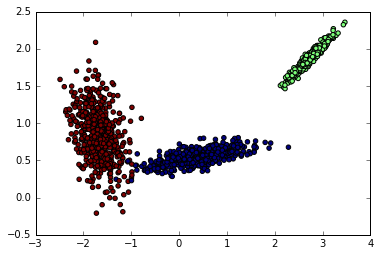

In [5]:
# if it looks strange, rerun it.
X, y = make_clusters(n_samples=1500, centers=3, cluster_std=[1,.6,.8])
scatter(X, y)

# Normal KMeans

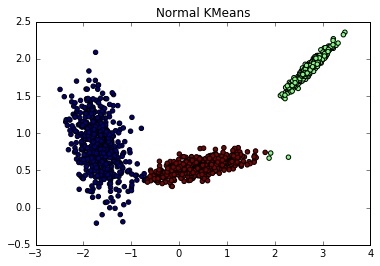

In [6]:
y_pred = KMeans(n_clusters=3).fit_predict(X)
scatter(X, y_pred)
plt.title("Normal KMeans")

# Then we see the KMeans failure, together with spectral clustering. Gaussian Mixture (GMM) wins

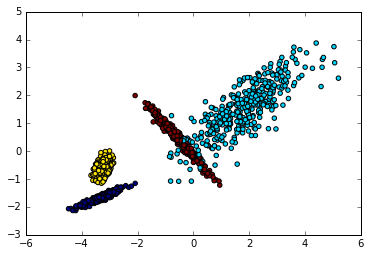

In [24]:
# if it looks too simple, rerun it.
n_clusters = 4
X, y = make_clusters(n_samples=1500, centers=4, cluster_std=[1,2,.5,1.5])
scatter(X, y)

C:\Miniconda2\envs\dev3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


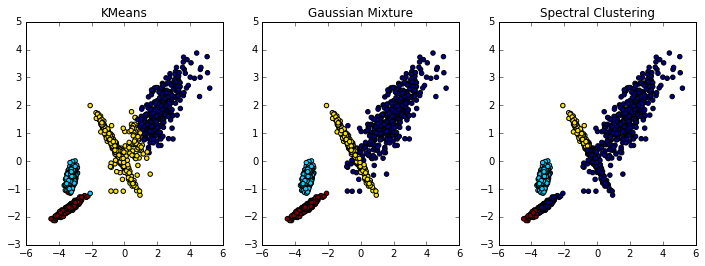

In [27]:
# n_clusters = 4

fig, axes = plt.subplots(1,3,figsize=(12,4))
y_kmeans = KMeans(n_clusters=n_clusters).fit_predict(X)
scatter(X, y_kmeans, ax=axes[0])
axes[0].set_title("KMeans")
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(X)
y_gmm = gmm.predict(X)
scatter(X, y_gmm, ax=axes[1])
axes[1].set_title("Gaussian Mixture")
y_sc = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack',affinity="nearest_neighbors").fit_predict(X)
scatter(X, y_sc,ax=axes[2])
plt.title("Spectral Clustering")

# Then we see the KMeans and GMM fails, only spectral clustering wins.

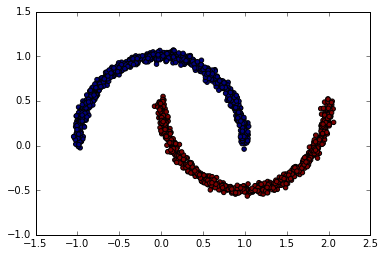

In [28]:
X, y = datasets.make_moons(n_samples=1500, noise=.03)
scatter(X, y)

C:\Miniconda2\envs\dev3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


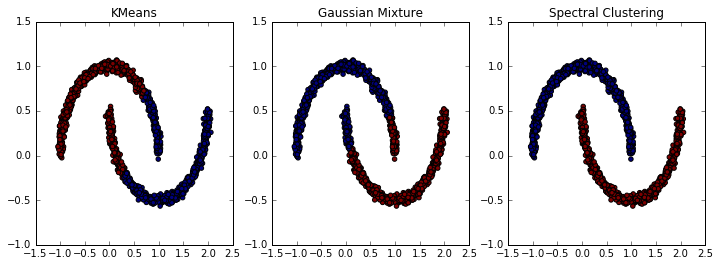

In [29]:
n_clusters = 2
fig, axes = plt.subplots(1,3,figsize=(12,4))
y_kmeans = KMeans(n_clusters=n_clusters).fit_predict(X)
scatter(X, y_kmeans, ax=axes[0])
axes[0].set_title("KMeans")
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(X)
y_gmm = gmm.predict(X)
scatter(X, y_gmm, ax=axes[1])
axes[1].set_title("Gaussian Mixture")
y_sc = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack',affinity="nearest_neighbors").fit_predict(X)
scatter(X, y_sc,ax=axes[2])
plt.title("Spectral Clustering")

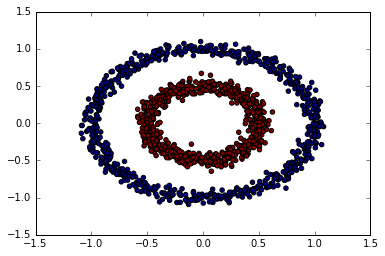

In [30]:
X, y = datasets.make_circles(n_samples=1500, factor=0.5, noise=0.05)
scatter(X, y)

C:\Miniconda2\envs\dev3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


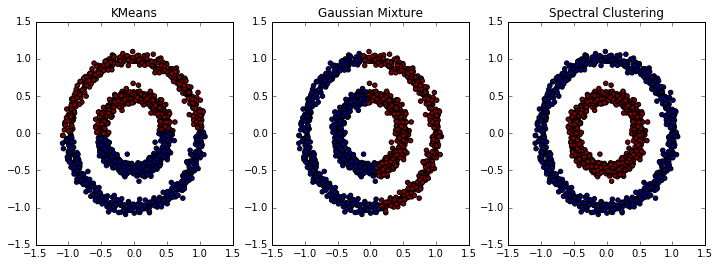

In [31]:
n_clusters = 2
fig, axes = plt.subplots(1,3,figsize=(12,4))
y_kmeans = KMeans(n_clusters=n_clusters).fit_predict(X)
scatter(X, y_kmeans, ax=axes[0])
axes[0].set_title("KMeans")
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full').fit(X)
y_gmm = gmm.predict(X)
scatter(X, y_gmm, ax=axes[1])
axes[1].set_title("Gaussian Mixture")
y_sc = SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack',affinity="nearest_neighbors").fit_predict(X)
scatter(X, y_sc,ax=axes[2])
plt.title("Spectral Clustering")